In [ ]:
import statsmodels.api
#import wrangle
#from wrangle import loadcsv
#from wrangle import build_dict
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os 
from functools import partial, reduce
from io import BytesIO
import requests
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
import scipy
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
import seaborn as sns
import colorcet as cc
import re
#sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

c:\Users\maria.vergara\AppData\Local\anaconda3\envs\IVSCC\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#human snakemake+jem+age+txs rna amp pass (with fake age for reg plots) merged dataframe
mouseWB_df_ephys_txs = pd.read_excel(r'../data/mouse_tt_WB_ch_ephys.xlsx')
mouseWB_df_ephys_txs.head(3)

,cell,tot_-50,tot_-35,tot_-20,tot_-5,tot_10,tot_25,tot_40,tot_55,tot_70,...,avg_isi,f_i_curve_slope,has_burst,has_pause,has_delay,created_at,updated_at,class,nonfast_tot_70_ratio,fast_tot_70_ratio
0,Ctgf-T2A-dgCre;Ai14-496566.03.01.01,0.074444,0.267532,0.695577,1.305129,2.002863,2.399162,2.781400,3.511871,3.651309,...,NaN,NaN,NaN,NaN,NaN,2020-08-16 03:07:08.806033,2020-08-17 16:26:58.977102,Glutamatergic,0.461362,0.775607
1,Rbp4-Cre_KL100;Ai14-658999.10.09.02,0.069235,0.407896,0.874963,2.587283,5.070571,7.246029,8.901930,10.373590,11.242473,...,36.326923,0.566577,NaN,NaN,NaN,2023-02-15 19:51:17.248904,2023-02-15 19:51:17.248904,Glutamatergic,0.695752,0.326325
2,Ctgf-T2A-dgCre;Ai14-509689.04.02.01,0.184972,0.169915,0.382888,NaN,1.385268,1.760363,2.174393,2.209563,2.581076,...,75.521667,0.305721,NaN,NaN,NaN,2021-08-31 00:19:41.534216,2021-08-31 00:19:41.534216,Glutamatergic,NaN,NaN


In [3]:
# #Filter for seuratqc pass
# human_data_ephys_jem_age_txs_pass = human_data_ephys_jem_age_txs_pass.loc[((human_data_ephys_jem_age_txs_pass['seuratQCpass']) == 'Pass')]
# human_data_ephys_jem_age_txs_pass

In [4]:
#Filter for Hodge Glutamatergic cells only
mouseWB_df_ephys_txs_glut = mouseWB_df_ephys_txs.loc[((mouseWB_df_ephys_txs['class']) == 'Glutamatergic')]
mouseWB_df_ephys_txs_glut.head(3)

,cell,tot_-50,tot_-35,tot_-20,tot_-5,tot_10,tot_25,tot_40,tot_55,tot_70,...,avg_isi,f_i_curve_slope,has_burst,has_pause,has_delay,created_at,updated_at,class,nonfast_tot_70_ratio,fast_tot_70_ratio
0,Ctgf-T2A-dgCre;Ai14-496566.03.01.01,0.074444,0.267532,0.695577,1.305129,2.002863,2.399162,2.781400,3.511871,3.651309,...,NaN,NaN,NaN,NaN,NaN,2020-08-16 03:07:08.806033,2020-08-17 16:26:58.977102,Glutamatergic,0.461362,0.775607
1,Rbp4-Cre_KL100;Ai14-658999.10.09.02,0.069235,0.407896,0.874963,2.587283,5.070571,7.246029,8.901930,10.373590,11.242473,...,36.326923,0.566577,NaN,NaN,NaN,2023-02-15 19:51:17.248904,2023-02-15 19:51:17.248904,Glutamatergic,0.695752,0.326325
2,Ctgf-T2A-dgCre;Ai14-509689.04.02.01,0.184972,0.169915,0.382888,NaN,1.385268,1.760363,2.174393,2.209563,2.581076,...,75.521667,0.305721,NaN,NaN,NaN,2021-08-31 00:19:41.534216,2021-08-31 00:19:41.534216,Glutamatergic,NaN,NaN


In [5]:
#Filter for Hodge Gabaergic cells only
mouseWB_df_ephys_txs_gaba = mouseWB_df_ephys_txs.loc[((mouseWB_df_ephys_txs['class']) == 'GABAergic')]
mouseWB_df_ephys_txs_gaba.head(3)

,cell,tot_-50,tot_-35,tot_-20,tot_-5,tot_10,tot_25,tot_40,tot_55,tot_70,...,avg_isi,f_i_curve_slope,has_burst,has_pause,has_delay,created_at,updated_at,class,nonfast_tot_70_ratio,fast_tot_70_ratio
5,Sst-IRES-Cre;Ai14-421493.04.02.01,0.026787,0.229196,0.690363,1.680730,2.648103,4.153051,5.326201,5.947414,6.950618,...,50.585556,0.410989,NaN,NaN,NaN,2019-07-13 04:30:06.768736,2020-01-02 20:21:11.858369,GABAergic,0.478584,0.591824
9,Htr3a-Cre_NO152;Ai14-599393.10.02.02,0.070771,0.091249,0.104843,0.496917,1.700440,2.928405,4.409529,5.618561,6.532347,...,5.420000,0.199501,NaN,NaN,NaN,2021-10-21 23:12:09.869181,2021-10-21 23:12:09.869181,GABAergic,0.619271,0.520765
10,Sst-IRES-Cre;Ai14-508748.05.06.01,-0.015831,0.619753,7.338546,15.399331,19.694461,21.678911,21.257278,19.742097,16.470783,...,NaN,NaN,NaN,NaN,NaN,2020-08-16 03:29:07.139357,2020-08-17 16:20:28.858543,GABAergic,0.487267,0.565911


In [6]:
color_dict = {
    'Inh L1-2 PAX6 CDH12': '#DDACC9',
    'Inh L1-2 PAX6 TNFAIP8L3': '#FF88AD',
    'Inh L1 SST NMBR (ADARB2+)': '#E67B73',
    'Inh L1-4 LAMP5 LCP2 (rosehip)': '#FFA388',
    'Inh L1-2 LAMP5 DBP': '#FF7466',
    'Inh L2-6 LAMP5 CA1 (Igtp)': '#C77963',
    'Inh L1 SST CHRNA4 (ADARB2+)': '#DD6091',
    'Inh L1-2 GAD1 MC4R (ADARB2+)': '#FF7290',
    'Inh L1-2 SST BAGE2 (ADARB2+)': '#9440F3',
    'Inh L1-3 PAX6 SYT6 (Sncg)': '#9900B3',
    'Inh L1-2 VIP TSPAN12': '#6C00BF',
    'Inh L1-4 VIP CHRNA6': '#7A0099',
    'Inh L1-3 VIP ADAMTSL1': '#7779BF',
    'Inh L3-6 VIP HS3ST3A1': '#FF00FF',
    'Inh L1-2 VIP PCDH20': '#BD3D9A',
    'Inh L2-5 VIP SERPINF1': '#B09FFF',
    'Inh L2-5 VIP TYR': '#FF4DC1',
    'Inh L1-3 VIP CHRM2': '#9FAAFF',
    'Inh L2-4 VIP CBLN1': '#756FB3',
    'Inh L1-3 VIP CCDC184': '#FF00B3',
    'Inh L1-3 VIP GGH': '#B3128A',
    'Inh L1-2 VIP LBH': '#AF00E6',
    'Inh L2-3 VIP CASC6': '#992E81',
    'Inh L2-4 VIP SPAG17': '#A711C1',
    'Inh L1-4 VIP OPRM1': '#9F219D',
    'Inh L3-6 SST NPY (Chodl)': '#FFDA50',
    'Sst_Chodl': '#BF6E30',
    'Inh L3-6 SST HPGD': '#D9C566',
    'Inh L4-6 SST B3GAT2': '#FFBB33',
    'Inh L5-6 SST KLHDC8A': '#C11331',
    'Inh L5-6 SST NPM1P10': '#BF8219',
    'Inh L4-6 SST GXYLT2': '#802600',
    'Inh L4-5 SST STK32A': '#806B19',
    'Inh L1-3 SST CALB1': '#BF480D',
    'Inh L3-5 SST ADGRG6': '#804811',
    'Inh L2-4 SST FRZB': '#FF554D',
    'Inh L5-6 SST TH': '#A81111',
    'Inh L5-6 GAD1 GLP1R (LHX6+)': '#FF2F7E',
    'Inh L5-6 PVALB LGR5': '#ED4C50',
    'Inh L4-5 PVALB MEPE': '#994C00',
    'Inh L2-4 PVALB WFDC2': '#BC2B11',
    'Inh L4-6 PVALB SULF1': '#E62A5D',
    'Inh L5-6 SST MIR548F2': '#D6221D',
    'Inh L2-5 PVALB SCUBE3 (chandelier)': '#FF197F',
    'Pvalb_ChC': '#D83849',
    'Exc L2 LAMP5 LTK': '#D9F077',
    'Exc L2-4 LINC00507 GLP2R': '#A6E6A9',
    'Exc L2-3 LINC00507 FREM3': '#7AE6AB',
    'Exc L5-6 THEMIS C1QL3': '#A19922',
    'Exc L3-4 RORB CARM1P1': '#00979D',
    'Exc L3-5 RORB ESR1': '#00DDC5',
    'Exc L3-5 RORB COL22A1': '#00A79D',
    'Exc L3-5 RORB FILIP1L': '#0094C2',
    'Exc L4-5 RORB FOLH1B': '#00A809',
    'Exc L4-6 RORB SEMA3E': '#26FFF2',
    'Exc L4-5 RORB DAPK2': '#00FF00',
    'Exc L5-6 RORB TTC12': '#26BF64',
    'Exc L4-6 RORB C1R': '#008F1F',
    'Exc L4-5 FEZF2 SCN4B (PT)': '#104F00',
    'Exc L4-5 FEZF2 SCN4B': '#104F00', #sarah added and copied color above. 
    'Exc L5-6 THEMIS DCSTAMP': '#5100FF',
    'Exc L5-6 THEMIS CRABP1': '#8046FF',
    'Exc L5-6 THEMIS FGF10': '#B08BFF',
    'Exc L4-6 FEZF2 IL26 (NP)': '#73CA95',
    'Exc L4-6 FEZF2 IL26': '#73CA95', #sarah added and copied color above
    'Exc L5-6 FEZF2 IL15' : '#73CA95', #Brian added and copied color above
    'Exc L5-6 FEZF2 ABO': '#1F6666',
    'Exc L5-6 SLC17A7 IL15': '#336D99',
    'Exc L5-6 FEZF2 EFTUD1P1': '#335280',
    'THEMIS (L6)|b': '#9A6EFF',
    'PVALB|c': '#D22B43',
    'RORB (L4)|c': '#54BABD',
    'L2-L3|b': '#C1EB92',
    'PVALB|b': '#C13837',
    'SST|e': '#A36012',
    'SST|d': '#E28532',
    'RORB (L5)': '#1BA94A',
    'VIP|i': '#8C90DC',
    'L1-L2 ADARB2|b': '#EF6991',
    'THEMIS (L6)|a': '#865AFF',
    'VIP|l': '#A31AB0',
    'VIP|k': '#A421BA',
    'VIP|h': '#BA75CF',
    'LAMP5|c': '#FF8D78',
    'SST|g': '#A3480F',
    'PVALB|a': '#C63331',
    'FEZF2 (L6b)|c': '#367B99',
    'RORB (L4-L5)|b': '#1BFFAB',
    'RORB (L4)|b': '#45B4B3',
    'VIP|d': '#D800FF',
    'SST|c': '#C57426',
    'L2-L3|a': '#ADE99B',
    'L1-L2 ADARB2|a': '#D55EB7',
    'VIP|g': '#B866C0',
    'RORB (L4-L5)|a': '#16E68C',
    'PVALB (all)|b': '#CF3939',
    'LAMP5|b': '#EE8772',
    'FEZF2 (L6b)|b': '#316C8A',
    'SST|f': '#C64D2E',
    'PAX6': '#EF9BBC',
    'VIP (Sncg-like)': '#7300AD',
    'Sncg': '#7300AD',
    'SST|b': '#B97223',
    'RORB (L4)|a': '#3CBFB7',
    'VIP|c': '#CF23E2',
    'PVALB (all)|a': '#D83849',
    'Pvalb': '#D83849',
    'PV': '#D83849',
    'VIP (Igfbp6)': '#5E609E',
    'VIP|j': '#A41EB5',
    'FEZF2 (L6b)|a': '#316688',
    'L2-L3 or L6': '#AAD887',
    'SST|a': '#BF8435',
    'RORB (L3-L4, all)': '#35B8B2',
    'LAMP5|a': '#EC8472',
    'VIP or Sncg': '#8100AF',
    'VIP|f': '#AE4BBB',
    'RORB (L4-L5, all)': '#18CF76',
    'SST (all)|b': '#C17433',
    'VIP|b': '#D454E2',
    'RORB (all)': '#29C497',
    'SST (all)|a': '#BF6E30',
    'Sst': '#BF6E30',
    'SST': '#BF6E30',
    'VIP|a': '#BE4ECB',
    'VIP+ |b': '#B042B3',
    'FEZF2 (L6b, all)': '#2E6682',
    'L1-L5|b': '#61CA93',
    'VIP+ |a': '#9F4BAE',
    'VIP+ (all)': '#B34DC0',
    'Vip': '#B34DC0',
    'VIP': '#B34DC0',
    'LHX6|c': '#C95E3B',
    'LAMP5/PAX6': '#ED8C8F',
    'Lamp5_Lhx6': '#ED8C8F',
    'Lamp5': '#ED8C8F',
    'Pax6' : '#ED8C8F',
    'L1-L5|a': '#5EC48E',
    'L1-L6': '#66B7A6',
    'LHX6|b': '#CC693C',
    'FEZF2 (all)': '#3F7D85',
    'ADARB2': '#C15FB7',
    'LHX6|a': '#CF6642',
    'Excitatory': '#5EAA9F',
    'excitatory': '#5EAA9F',
    'Glutamatergic': '#5EAA9F',
    'Inhibitory': '#C76293',
    'inhibitory': '#C76293',
    'GABAergic': '#C76293',
    'FAIL': '#888888',
    'Inh L2-6 VIP QPCT': '#A700FF',
    'Inh L1-4 VIP PENK': '#3C3D73',
    'Exc L6 FEZF2 OR2T8': '#254566',
    'Exc L3-5 RORB TWIST2': '#77D9B7',
    'Exc L6 FEZF2 SCUBE1': '#388899',
    'L2-3_IT': '#D9F077',
    'L2-3': '#D9F077',
    'L4_IT': '#00979D',
    'L4': '#00979D',
    'L5_ET': '#104F00',
    'L5_IT': '#00FF00',
    'L5-6-IT': '#00FF00',
    'L5': '#00FF00', 
    'L5-6_NP': '#73CA95',
    'L6_CT': '#1F6666',
    'L6b': '#335280',
    'L6_IT': '#A19922',
    'L6': '#A19922',
    'L6_IT_Car3': '#8046FF',
    '0-1yrs': '#1db01a',
    '1-2yrs': '#0c6e50',
    '2-4yrs': '#1b7382',
    '4-8yrs': '#0e11c9',
    '8-12yrs': '#0b5fde',
    '12-16yrs': '#720dd1',
    '16-20yrs': '#e312ce',
    '20-40yrs': '#e1f50c',
    '40-60yrs': '#eb8909',
    '60-100yrs': '#eb0958',
    'Unknown': '#888888',
}

In [7]:
#Ephys features list (limited)
f_list = [
    "sag",
    "vm_for_sag",
    "tau",
    "upstroke_downstroke_ratio_ramp",
    "upstroke_downstroke_ratio_short_square",
    "upstroke_downstroke_ratio_long_square",
    "peak_v_ramp",
    "peak_t_ramp",
    "peak_v_short_square",
    "peak_t_short_square",
    "peak_v_long_square",
    "peak_t_long_square",
    "trough_v_ramp",
    "trough_t_ramp",
    "trough_v_short_square",
    "trough_t_short_square",
    "trough_v_long_square",
    "trough_t_long_square",
    "fast_trough_v_ramp",
    "fast_trough_t_ramp",
    "fast_trough_v_short_square",
    "fast_trough_t_short_square",
    "fast_trough_v_long_square",
    "fast_trough_t_long_square",
    "slow_trough_v_ramp",
    "slow_trough_t_ramp",
    "slow_trough_v_short_square",
    "slow_trough_t_short_square",
    "slow_trough_v_long_square",
    "slow_trough_t_long_square",
    "threshold_v_ramp",
    "threshold_v_short_square",
    "threshold_v_long_square",
    "threshold_i_ramp",
    "threshold_i_short_square",
    "threshold_i_long_square",
    "threshold_t_ramp",
    "threshold_t_short_square",
    "threshold_t_long_square",
    "adaptation",
    "latency",
    "avg_isi",
    "f_i_curve_slope"
]


In [37]:
#Start on UMAPs
features_mouseWB_ephys = mouseWB_df_ephys_txs[mouseWB_df_ephys_txs.columns.intersection(f_list)]

In [78]:
features=['class', 'subclass', 'ttype','supertype', 
          'nonfast_tot_70_ratio', 'fast_tot_70_ratio',
          'nonfast_70','fast_70', 'tot_70']

    
for f in features:
    features_mouseWB_ephys.loc[:,(f)] = mouseWB_df_ephys_txs.loc[:,(f)]
    features_mouseWB_ephys.loc[:,(f)].fillna(np.nan, inplace=True)

In [79]:
features_mouseWB_ephys.head(3)

,sag,vm_for_sag,tau,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,upstroke_downstroke_ratio_long_square,peak_v_ramp,peak_t_ramp,peak_v_short_square,peak_t_short_square,...,subclass,ttype,supertype,nonfast_tot_70_ratio,fast_tot_70_ratio,UMAP1,UMAP2,nonfast_70,fast_70,tot_70
1,0.482051,-82.937500,13.190150,1.196060,1.240266,1.213293,30.125000,2.500693,30.625000,0.50336,...,STN-PSTN Pitx2,2225,STN-PSTN Pitx2 Glut_5,0.695752,0.326325,4.813252,8.375661,7.821974,3.668703,11.242473
2,0.091225,-98.437500,32.892229,4.623387,4.420868,4.679864,35.289585,0.832347,37.418751,0.50357,...,L6b CTX,34,L6b CTX Glut_3,NaN,NaN,7.611430,5.906428,NaN,NaN,2.581076
4,0.254175,-81.074997,16.995495,3.673191,3.571938,3.684451,47.202087,4.383153,43.990627,0.50355,...,L5 ET CTX,399,L5 ET CTX Glut_3,0.574609,0.562337,7.060946,0.961123,3.880355,3.797479,6.753030


In [80]:
features_mouseWB_ephys.shape

(517, 54)

In [81]:
features_mouseWB_ephys.fillna(np.nan, inplace=True)

numfeatures=(len(f_list))*.25
features_mouseWB_ephys = features_mouseWB_ephys.dropna(thresh=features_mouseWB_ephys.shape[1]-(numfeatures))
null=features_mouseWB_ephys.isnull().sum(axis=1)
print(null)
features_mouseWB_ephys.shape

1      6
2      8
4      6
5      4
6      2
      ..
775    4
777    6
778    6
779    2
780    2
Length: 471, dtype: int64


(471, 54)

In [82]:
UMAP_ephys = features_mouseWB_ephys[features_mouseWB_ephys.columns.intersection(f_list)]
UMAP_ephys

,sag,vm_for_sag,tau,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,upstroke_downstroke_ratio_long_square,peak_v_ramp,peak_t_ramp,peak_v_short_square,peak_t_short_square,...,threshold_i_ramp,threshold_i_short_square,threshold_i_long_square,threshold_t_ramp,threshold_t_short_square,threshold_t_long_square,adaptation,latency,avg_isi,f_i_curve_slope
1,0.482051,-82.937500,13.190150,1.196060,1.240266,1.213293,30.125000,2.500693,30.625000,0.503360,...,50.083332,330.0,21.999998,2.500353,0.503040,0.675500,0.012642,0.02184,36.326923,0.566577
2,0.091225,-98.437500,32.892229,4.623387,4.420868,4.679864,35.289585,0.832347,37.418751,0.503570,...,8.333333,160.0,4.000000,0.831807,0.503080,1.340880,0.027534,0.02106,75.521667,0.305721
4,0.254175,-81.074997,16.995495,3.673191,3.571938,3.684451,47.202087,4.383153,43.990627,0.503550,...,97.166664,800.0,100.000000,4.382713,0.503140,0.584680,0.055423,0.03384,104.260000,0.130841
5,0.140604,-103.125000,28.427795,2.790414,2.467418,2.954748,34.674999,2.570820,29.287500,0.503680,...,51.833332,450.0,50.000000,2.570340,0.503260,0.734200,0.008659,0.04668,50.585556,0.410989
6,0.061390,-100.312500,14.961455,4.802465,4.659908,5.075470,40.572918,2.531838,37.000000,0.503515,...,50.875000,630.0,46.000000,2.531353,0.503095,0.826665,0.014314,0.04672,60.954333,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.260495,-78.699997,15.817618,3.625674,3.633869,3.795614,44.729168,6.293400,43.012501,0.503493,...,144.833328,1030.0,140.000000,6.292960,0.503093,0.595760,0.076208,0.04376,195.635000,0.085000
777,0.226950,-94.068748,24.832006,3.114230,2.744286,3.469527,37.700001,1.674525,32.418747,0.503520,...,29.406250,450.0,29.999998,1.673975,0.503040,0.668940,0.028721,0.03852,70.433846,0.250000
778,0.203528,-100.718750,26.064657,1.426311,1.473102,1.540740,18.083334,1.219127,19.796877,0.503710,...,18.041666,220.0,2.000000,1.218780,0.503390,1.138100,0.004515,0.02130,42.656364,0.545168
779,0.255438,-79.731247,11.218755,3.173067,3.033710,3.401719,35.054165,3.937780,31.543751,0.503400,...,86.000000,540.0,90.000000,3.937340,0.503020,0.571460,0.031414,0.02726,60.698750,0.330000


In [83]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
UMAP_ephys[UMAP_ephys.columns] = imputer.fit_transform(UMAP_ephys)

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_18564\2034303511.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.12,metric='euclidean')

In [85]:
#make a dataframe consisting of scaled values of each datapoint
umap_data = UMAP_ephys #.drop(features, axis = 1)
umap_data = umap_data.values
scaled_umap_data = StandardScaler().fit_transform(umap_data)
##make umap from scaled data
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(471, 2)

In [86]:
###add umap data to select ephys df
UMAP_ephys['UMAP1']=embedding[:, 0]
UMAP_ephys['UMAP2']=embedding[:, 1]
features_mouseWB_ephys['UMAP1']=embedding[:, 0]
features_mouseWB_ephys['UMAP2']=embedding[:, 1]

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_18564\1933178259.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maria.vergara\AppData\Local\Temp\ipykernel_18564\1933178259.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



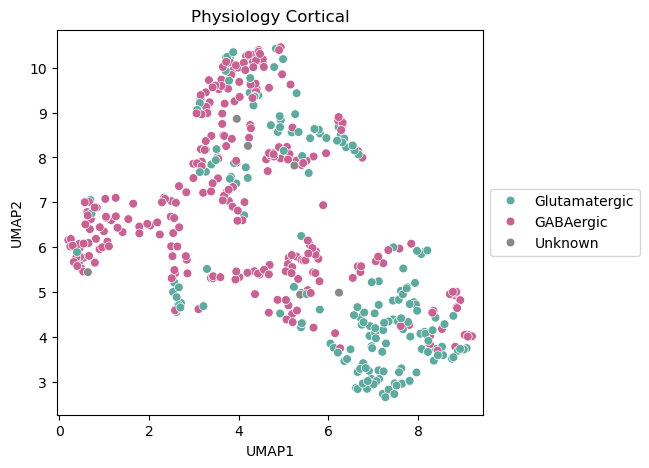

In [87]:
plt.figure(figsize=(5.5, 5))
#ax=sns.scatterplot(data=features_human_ephys_2, x='UMAP3', y='UMAP4', color= "lightgray")
ax=sns.scatterplot(data=features_mouseWB_ephys,
    x='UMAP1',
    y='UMAP2',
    hue='class',
    s=40,
    palette = color_dict
                  )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Physiology Cortical', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.savefig('UMAP.svg')


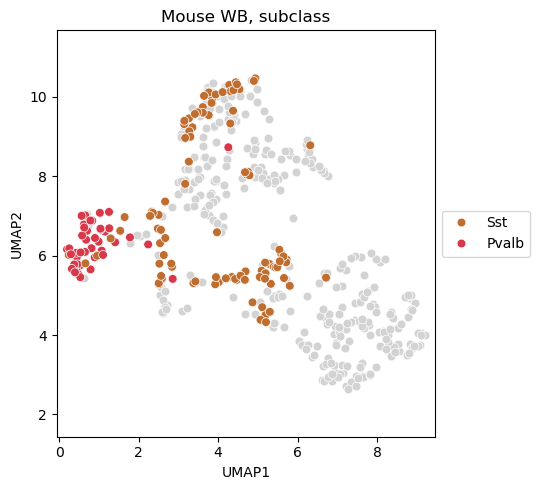

In [88]:
hue_by = 'subclass'
plt.figure(figsize=(5.5,5))
ax=sns.scatterplot(data=features_mouseWB_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseWB_ephys[
        (features_mouseWB_ephys[hue_by] == 'L2-3_IT') | 
        (features_mouseWB_ephys[hue_by] == 'Sst') | 
        (features_mouseWB_ephys[hue_by] == 'Exc L4_5 IT') | 
        (features_mouseWB_ephys[hue_by] == 'Pvalb') | 
        (features_mouseWB_ephys[hue_by] == 'Pvalb_ChC')
    ],
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, s=40, palette = color_dict
                  )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse WB, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAP_MouseWB_{hue_by}.jpg', dpi=300)#'UMAP.svg')

In [89]:
features_mouseWB_ephys['subclass'].unique()

array(['STN-PSTN Pitx2', 'L6b CTX', 'L5 ET CTX', 'Sst', 'PVT-PT Ntrk1',
       'L2/3 IT CTX', 'OB-STR-CTX Inh', 'STR D1', 'GPe-SI Sox6 Cyp26b1',
       'Pvalb', 'L6 IT CTX', 'Vip', 'L6 CT CTX', 'Sncg', 'L5 IT CTX',
       'Lamp5', 'STR D2', 'Sst Chodl', 'L4 RSP-ACA', 'NDB-SI-ant Prdm12',
       'TH Prkcd Grin2c', 'CLA-EPd-CTX Car3', 'CEA-BST Ebf1 Pdyn',
       'Pvalb chandelier', 'ZI Pax6', 'L5 NP CTX', 'MB-MY Tph2',
       'SNr-VTA Pax5 Npas1', 'L4/5 IT CTX', 'PGRN-PARN-MDRN Hoxb5',
       'LDT-DTN Gata3 Nfix', 'L5/6 IT TPE-ENT', 'L6b/CT ENT',
       'L2/3 IT PIR-ENTl', 'PRNc-NI-SG-RPO Vsx2 Nr4a2', 'PAG Ucn',
       'CM-IAD-CL-PCN Sema5b', 'SNr Six3', 'Lamp5 Lhx6', 'STR Lhx8',
       'PRC-PAG Tcf7l2 Irx2', 'L2/3 IT ENT', 'SI-MA-LPO-LHA Skor1',
       'CUN-PPN Evx2 Meis2', 'L2/3 IT RSP', 'PAG-PPN Pax5 Sox21',
       'PAG-ND-PCG Onecut1', 'DTN-LDT-IPN Otp Pax3', 'RHP-COA Ndnf',
       'RE-Xi Nox4', 'NDB-SI-MA-STRv Lhx8', 'IT AON-TT-DP',
       'STR-PAL Chst9', 'SNc-VTA-RAmb Foxa1', 'RT-

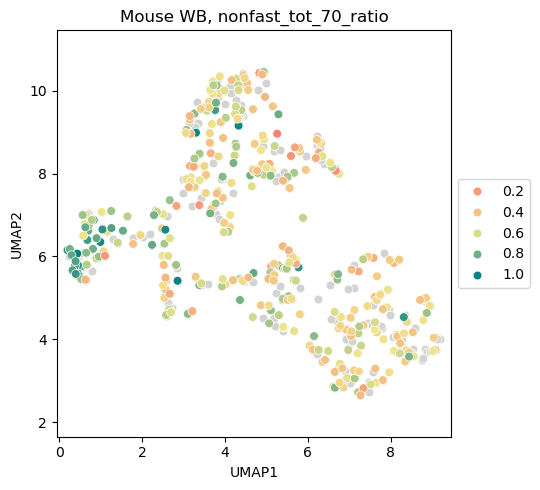

In [ ]:
hue_by = 'nonfast_tot_70_ratio'
plt.figure(figsize=(5.5,5))

salmon_to_teal = LinearSegmentedColormap.from_list('salmon_to_teal', ['salmon', 'khaki', 'teal'], N=256)

ax=sns.scatterplot(data=features_mouseWB_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseWB_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = salmon_to_teal
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse WB, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAP_MouseWB_{hue_by}.jpg', dpi=300)#'UMAP.svg')

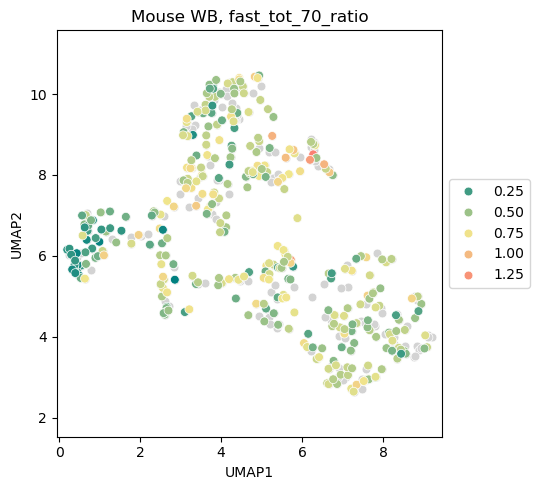

In [91]:
hue_by = 'fast_tot_70_ratio'
plt.figure(figsize=(5.5,5))

teal_to_salmon = LinearSegmentedColormap.from_list('teal_to_salmon', ['teal', 'khaki','salmon'], N=256)

ax=sns.scatterplot(data=features_mouseWB_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseWB_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = teal_to_salmon
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse WB, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAP_MouseWB_{hue_by}.jpg', dpi=300)#'UMAP.svg')

In [94]:
# not using total but sum of fast and nonfast for ratio calculation
features_mouseWB_ephys['ratio_fast_tot70_calc'] = features_mouseWB_ephys['fast_tot_70_ratio'] / (features_mouseWB_ephys['fast_tot_70_ratio'] + features_mouseWB_ephys['nonfast_tot_70_ratio'])

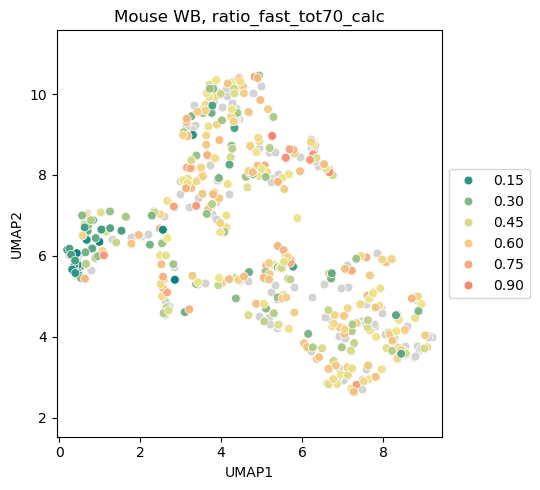

In [95]:
hue_by = 'ratio_fast_tot70_calc'
plt.figure(figsize=(5.5,5))

teal_to_salmon = LinearSegmentedColormap.from_list('teal_to_salmon', ['teal', 'khaki','salmon'], N=256)

ax=sns.scatterplot(data=features_mouseWB_ephys, x='UMAP1', y='UMAP2', color= "lightgrey", s=40)
ax=sns.scatterplot(
    data=features_mouseWB_ephys,
    x='UMAP1',
    y='UMAP2',
    hue=hue_by, 
    s=40, 
    palette = teal_to_salmon
    )

plt.legend(fontsize = 'xx-small')
plt.gca().set_aspect('equal', 'datalim')
plt.title(f'Mouse WB, {hue_by}', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefi
plt.tight_layout()
plt.savefig(fr'../results/UMAP_MouseWB_{hue_by}.jpg', dpi=300)#'UMAP.svg')